## Project: Prediction of TB in time using machine learning
- **Source**: Introductory R: A Begginer's Guide to Data Visualisation and Analysis using R, Robert J Knell, 2014
- **Date**: 10/02/24
- **Goal**: Create a basic prediction model guide

In [1]:
# Step 0. Import libraries, custom modules and logging
# Basics ---------------------------------------------------------------
import logging
import joblib
# Data -----------------------------------------------------------------
import pandas as pd
import numpy as np
# Graphics -------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Machine learning -----------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (mean_squared_error, 
                             mean_absolute_error,
                             r2_score)
# Logging initialization -----------------------------------------------
logger = logging.getLogger()
logger.setLevel(logging.INFO)

### 1. Data loading
**Objective**: Obtain the data from source and get a first glimpse of their properties and presentation

In [2]:
# Step 1. Load data and get a first view -------------------------------
# 1.1 Read from source and get basic info
df_raw = pd.read_csv('TB_disease.csv')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     13 non-null     int64  
 1   M.bovis  13 non-null     int64  
 2   MDR      12 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 444.0 bytes


In [3]:
# 1.2 Get a sample
display(df_raw.sample(5, random_state=2024))

,Year,M.bovis,MDR
5,2004,16,0.7
9,2008,21,0.7
2,2001,20,0.5
3,2002,12,0.7
12,2011,31,1.1


### 2. Data preprocessing
**Objectives**: Perform the data cleaning, data transformation and data reduction steps to avoid data mistmatching, noisy data or data not wrangled

In [4]:
# Step 2. Prepara the dataset for analysis
# 2.1 Make transformations using a pipeline
df_interim = (
    df_raw
    .copy()
    .set_axis(
        df_raw.columns.str.replace(' ','_')
        .str.replace(r'\W','',regex=True)
        .str.lower()
        .str.slice(0,40), axis=1
    )
    .rename(columns={'mbovis':'target'})
    .astype({'target': np.float16})
    .iloc[:,:2]
)

In [5]:
# 2.2 Create the final dataset with the target in front, show result
df = (
    df_interim
    .copy()
    .reindex(
        columns=(
            ['target'] + 
            [c for c in df_interim.columns.to_list() if c not in ['target']]
        )
    )
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  13 non-null     float16
 1   year    13 non-null     int64  
dtypes: float16(1), int64(1)
memory usage: 262.0 bytes


### 3. Exploratory Data Analysis
**Objective**: Summarize the main characteristics of the dataset using descriptive statistics and data visualization methods

In [20]:
# Step 3. Perform EDA
# 3.1 Split the dataset
df_train, df_test = train_test_split(df, 
                                     random_state=2024, 
                                     test_size=0.1)
df_train = df_train.reset_index(drop=True).sort_values(by='year')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 8 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  11 non-null     float16
 1   year    11 non-null     int64  
dtypes: float16(1), int64(1)
memory usage: 198.0 bytes


In [21]:
# 3.2 Get numerical and categorical summaries
display(df_train.describe(include='number').T)

,count,mean,std,min,25%,50%,75%,max
target,11.0,22.093750,5.890625,12.0,18.0,22.0,26.0,31.0
year,11.0,2004.818182,4.142902,1999.0,2001.5,2005.0,2008.0,2011.0


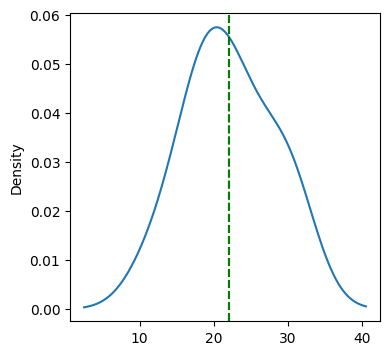

In [22]:
# 3.3 Perform univariate analysis on numerical variables
fig, ax = plt.subplots(figsize=(4,4))
df_train['target'].plot.density()
ax.axvline(x=df_train['target'].mean(), color='k', linestyle='--')
ax.axvline(x=df_train['target'].median(), color='g', linestyle='--')
plt.show()

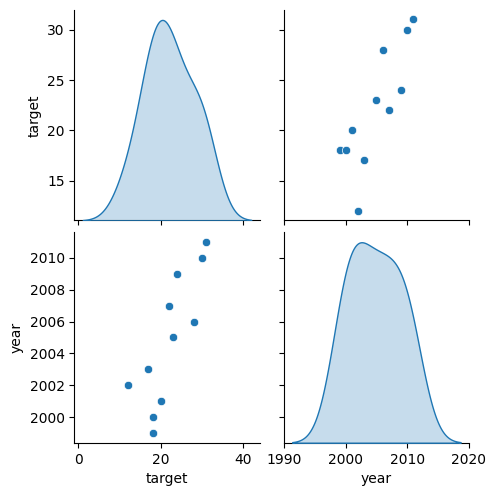

In [23]:
# 3.5 Perform bivariate analysis for numerical values
sns.pairplot(data=df_train, diag_kind='kde')
plt.show()

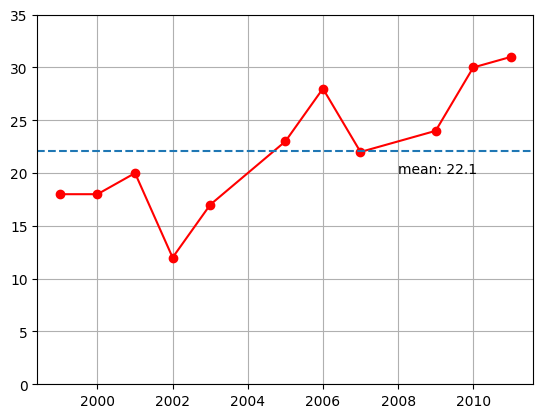

In [34]:
# 3.5 Perform bivariate analysis as a trend
plt.plot(df_train['year'],df_train['target'],'o-r')
plt.axhline(df_train['target'].mean(),linestyle='--')
plt.annotate(text=f'mean: {df_train['target'].mean():.1f}', xy=(2008,20))
plt.ylim(0,35)
plt.grid(True)
plt.show()

### 4. Machine learning
**Objective**: Create a model that learns from data to make predictions and generalize to unseen data, and thus perform tasks without explicit instructions

In [35]:
# Step 4. Experiment with models
# 4.1 Split features and reponse
X_train = df_train.drop('target', axis=1).reset_index(drop=True)
y_train = df_train['target'].reset_index(drop=True)
X_test = df_test.drop('target', axis=1).reset_index(drop=True)
y_test = df_test['target'].reset_index(drop=True)

In [37]:
# 4.2 Create a naive model, by using the mean, then evaluate
y_mean = np.repeat(df_train['target'].mean(), len(df_train))
print(f'MSE: {mean_squared_error(y_train, y_mean):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_train, y_mean)):.2f}')
print(f'MAE: {mean_absolute_error(y_train, y_mean):.2f}')

MSE: 31.53
RMSE: 5.62
MAE: 4.64
